In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

Importing **Pandas**, **Numpy** and **Matplotlib**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import gc
from datetime import datetime as dt

# **Importing Dataset**

To download dataset

https://drive.google.com/file/d/1uf565R9pIb8YwuPur9CJIq4Wl_4jZyPt/view?usp=share_link

In [3]:
%%time
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Interview Assessment/stats_full_stack_dev.csv', index_col=0, parse_dates=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/magics/execution.py:1310: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 27.3 s, sys: 5.94 s, total: 33.3 s
Wall time: 40.8 s


Remove all **NaN** value rows from dataset

In [ ]:
dataset = dataset[dataset['time_stamp'].notna()]
#dataset['time_stamp'].isnull().values.sum() #check if all the NaN rows are removed or not

In [ ]:
dataset

_id  \
3629738  62c1bab458e8c0ea705a1c6c   
3629739  62c1bab458e8c0ea705a2f5d   
3629740  62c1bab458e8c0ea705a2f5e   
3629741  62c1bab458e8c0ea705a2f5f   
3629742  62c1bab458e8c0ea705a2f60   
...                           ...   
9999995  62e28bd36bee893c41a6df65   
9999996  62e28bd36bee893c41a6df66   
9999997  62e28bd36bee893c41a6df68   
9999998  62e28bd56bee893c41a6df69   
9999999  62e28bd56bee893c41a6df6a   

                                               Function      Time  Error  \
3629738         get_newest_articles_api.py get_keywords  4.328657  False   
3629739           get_newest_articles_api.py save_to_db  0.178776  False   
3629740   get_newest_articles_api.py db_check_not_empty  0.003546  False   
3629741  get_newest_articles_api.py db_get_newest_entry  0.003825  False   
3629742                  get_newest_articles_api.py get  0.019008  False   
...                                                 ...       ...    ...   
9999995                   main.py (API)  recommendation  0.399632  False   
9999996                             main.py (API)  main  0.589446  False   
9999997                       main.py (API)  save_to_db  0.002028  False   
9999998                main.py (API)  collection_exists  0.001927  False   
9999999              main.py (API)  db_get_newest_entry  0.002539  False   

                         time_stamp  
3629738  2022-07-03 15:50:12:096366  
3629739  2022-07-03 15:50:12:295228  
3629740  2022-07-03 15:50:12:302513  
3629741  2022-07-03 15:50:12:309507  
3629742  2022-07-03 15:50:12:332944  
...                             ...  
9999995  2022-07-28 13:14:59:520012  
9999996  2022-07-28 13:14:59:543299  
9999997  2022-07-28 13:14:59:551056  
9999998  2022-07-28 13:15:01:834175  
9999999  2022-07-28 13:15:01:839191  

[5207146 rows x 5 columns]

# **Converting time_stamp column to datetime64 type**

In [ ]:
dataset['time_stamp'] = pd.to_datetime(dataset.iloc[:,4].str.strip(),format = '%Y-%m-%d %H:%M:%S:%f')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5207146 entries, 3629738 to 9999999
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   _id         object        
 1   Function    object        
 2   Time        float64       
 3   Error       object        
 4   time_stamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 238.4+ MB


In [ ]:
dataset['time_stamp'] = dataset['time_stamp'].astype('datetime64[ms]')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5207146 entries, 3629738 to 9999999
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   _id         object        
 1   Function    object        
 2   Time        float64       
 3   Error       object        
 4   time_stamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 238.4+ MB


In [ ]:
dataset

_id  \
3629738  62c1bab458e8c0ea705a1c6c   
3629739  62c1bab458e8c0ea705a2f5d   
3629740  62c1bab458e8c0ea705a2f5e   
3629741  62c1bab458e8c0ea705a2f5f   
3629742  62c1bab458e8c0ea705a2f60   
...                           ...   
9999995  62e28bd36bee893c41a6df65   
9999996  62e28bd36bee893c41a6df66   
9999997  62e28bd36bee893c41a6df68   
9999998  62e28bd56bee893c41a6df69   
9999999  62e28bd56bee893c41a6df6a   

                                               Function      Time  Error  \
3629738         get_newest_articles_api.py get_keywords  4.328657  False   
3629739           get_newest_articles_api.py save_to_db  0.178776  False   
3629740   get_newest_articles_api.py db_check_not_empty  0.003546  False   
3629741  get_newest_articles_api.py db_get_newest_entry  0.003825  False   
3629742                  get_newest_articles_api.py get  0.019008  False   
...                                                 ...       ...    ...   
9999995                   main.py (API)  recommendation  0.399632  False   
9999996                             main.py (API)  main  0.589446  False   
9999997                       main.py (API)  save_to_db  0.002028  False   
9999998                main.py (API)  collection_exists  0.001927  False   
9999999              main.py (API)  db_get_newest_entry  0.002539  False   

                 time_stamp  
3629738 2022-07-03 15:50:12  
3629739 2022-07-03 15:50:12  
3629740 2022-07-03 15:50:12  
3629741 2022-07-03 15:50:12  
3629742 2022-07-03 15:50:12  
...                     ...  
9999995 2022-07-28 13:14:59  
9999996 2022-07-28 13:14:59  
9999997 2022-07-28 13:14:59  
9999998 2022-07-28 13:15:01  
9999999 2022-07-28 13:15:01  

[5207146 rows x 5 columns]

# **Enter the number of rows till 5.2 million**

In [ ]:
num = input("Enter number of rows:")

Enter number of rows:5207146


# Deleting previous memory and save new DataFrame equal to entered number of rows

In [ ]:
new_dataset = pd.DataFrame()
new_dataset = dataset.head(int(num))
del [[dataset]]
gc.collect()
dataset=pd.DataFrame()
new_dataset

_id  \
3629738  62c1bab458e8c0ea705a1c6c   
3629739  62c1bab458e8c0ea705a2f5d   
3629740  62c1bab458e8c0ea705a2f5e   
3629741  62c1bab458e8c0ea705a2f5f   
3629742  62c1bab458e8c0ea705a2f60   
...                           ...   
9999995  62e28bd36bee893c41a6df65   
9999996  62e28bd36bee893c41a6df66   
9999997  62e28bd36bee893c41a6df68   
9999998  62e28bd56bee893c41a6df69   
9999999  62e28bd56bee893c41a6df6a   

                                               Function      Time  Error  \
3629738         get_newest_articles_api.py get_keywords  4.328657  False   
3629739           get_newest_articles_api.py save_to_db  0.178776  False   
3629740   get_newest_articles_api.py db_check_not_empty  0.003546  False   
3629741  get_newest_articles_api.py db_get_newest_entry  0.003825  False   
3629742                  get_newest_articles_api.py get  0.019008  False   
...                                                 ...       ...    ...   
9999995                   main.py (API)  recommendation  0.399632  False   
9999996                             main.py (API)  main  0.589446  False   
9999997                       main.py (API)  save_to_db  0.002028  False   
9999998                main.py (API)  collection_exists  0.001927  False   
9999999              main.py (API)  db_get_newest_entry  0.002539  False   

                     time_stamp  
3629738 2022-07-03 15:50:12.096  
3629739 2022-07-03 15:50:12.295  
3629740 2022-07-03 15:50:12.302  
3629741 2022-07-03 15:50:12.309  
3629742 2022-07-03 15:50:12.332  
...                         ...  
9999995 2022-07-28 13:14:59.520  
9999996 2022-07-28 13:14:59.543  
9999997 2022-07-28 13:14:59.551  
9999998 2022-07-28 13:15:01.834  
9999999 2022-07-28 13:15:01.839  

[5207146 rows x 5 columns]

**Dropping unnecessary columns**

In [ ]:
new_dataset.drop(['_id', 'Error'], axis=1, inplace=True)

In [ ]:
new_dataset

Function      Time  \
3629738         get_newest_articles_api.py get_keywords  4.328657   
3629739           get_newest_articles_api.py save_to_db  0.178776   
3629740   get_newest_articles_api.py db_check_not_empty  0.003546   
3629741  get_newest_articles_api.py db_get_newest_entry  0.003825   
3629742                  get_newest_articles_api.py get  0.019008   
...                                                 ...       ...   
9999995                   main.py (API)  recommendation  0.399632   
9999996                             main.py (API)  main  0.589446   
9999997                       main.py (API)  save_to_db  0.002028   
9999998                main.py (API)  collection_exists  0.001927   
9999999              main.py (API)  db_get_newest_entry  0.002539   

                     time_stamp  
3629738 2022-07-03 15:50:12.096  
3629739 2022-07-03 15:50:12.295  
3629740 2022-07-03 15:50:12.302  
3629741 2022-07-03 15:50:12.309  
3629742 2022-07-03 15:50:12.332  
...                         ...  
9999995 2022-07-28 13:14:59.520  
9999996 2022-07-28 13:14:59.543  
9999997 2022-07-28 13:14:59.551  
9999998 2022-07-28 13:15:01.834  
9999999 2022-07-28 13:15:01.839  

[5207146 rows x 3 columns]

**Get all the UNIQUE functions new DataFrame**

In [ ]:
new_dataset.Function.nunique() #Number of unique
unique_function = new_dataset.Function.unique() #unique values in an array

In [ ]:
counter = 0
for i in unique_function:
  print(i)
  counter += 1
print(counter)

get_newest_articles_api.py get_keywords
get_newest_articles_api.py save_to_db
get_newest_articles_api.py db_check_not_empty
get_newest_articles_api.py db_get_newest_entry
get_newest_articles_api.py get
get_newest_articles_api.py main
get_ge_data.py ga_api
get_ge_data.py save_to_db
get_ge_data.py main
main.py (API)  read_from_db_by_date
main.py (API)  db_get_articles_by_url
main.py (API)  main
main.py (API)  save_to_db
main.py (API)  collection_exists
main.py (API)  db_get_newest_entry
main.py (API)  read_from_db
main.py (API)  ai_cosin_sim
main.py (API)  recommendation
daily_sdct.py (categories and keywords)  save_to_db
daily_sdct.py (categories and keywords)  read_from_db
20


**Settign the index to prepare dataset for visualization**

In [ ]:
new_dataset[['time_stamp', 'Function', 'Time']]

time_stamp  \
3629738 2022-07-03 15:50:12.096   
3629739 2022-07-03 15:50:12.295   
3629740 2022-07-03 15:50:12.302   
3629741 2022-07-03 15:50:12.309   
3629742 2022-07-03 15:50:12.332   
...                         ...   
9999995 2022-07-28 13:14:59.520   
9999996 2022-07-28 13:14:59.543   
9999997 2022-07-28 13:14:59.551   
9999998 2022-07-28 13:15:01.834   
9999999 2022-07-28 13:15:01.839   

                                               Function      Time  
3629738         get_newest_articles_api.py get_keywords  4.328657  
3629739           get_newest_articles_api.py save_to_db  0.178776  
3629740   get_newest_articles_api.py db_check_not_empty  0.003546  
3629741  get_newest_articles_api.py db_get_newest_entry  0.003825  
3629742                  get_newest_articles_api.py get  0.019008  
...                                                 ...       ...  
9999995                   main.py (API)  recommendation  0.399632  
9999996                             main.py (API)  main  0.589446  
9999997                       main.py (API)  save_to_db  0.002028  
9999998                main.py (API)  collection_exists  0.001927  
9999999              main.py (API)  db_get_newest_entry  0.002539  

[5207146 rows x 3 columns]

In [ ]:
new_dataset.set_index('time_stamp',inplace=True)

In [ ]:
new_dataset

Function  \
time_stamp                                                                
2022-07-03 15:50:12.096         get_newest_articles_api.py get_keywords   
2022-07-03 15:50:12.295           get_newest_articles_api.py save_to_db   
2022-07-03 15:50:12.302   get_newest_articles_api.py db_check_not_empty   
2022-07-03 15:50:12.309  get_newest_articles_api.py db_get_newest_entry   
2022-07-03 15:50:12.332                  get_newest_articles_api.py get   
...                                                                 ...   
2022-07-28 13:14:59.520                   main.py (API)  recommendation   
2022-07-28 13:14:59.543                             main.py (API)  main   
2022-07-28 13:14:59.551                       main.py (API)  save_to_db   
2022-07-28 13:15:01.834                main.py (API)  collection_exists   
2022-07-28 13:15:01.839              main.py (API)  db_get_newest_entry   

                             Time  
time_stamp                         
2022-07-03 15:50:12.096  4.328657  
2022-07-03 15:50:12.295  0.178776  
2022-07-03 15:50:12.302  0.003546  
2022-07-03 15:50:12.309  0.003825  
2022-07-03 15:50:12.332  0.019008  
...                           ...  
2022-07-28 13:14:59.520  0.399632  
2022-07-28 13:14:59.543  0.589446  
2022-07-28 13:14:59.551  0.002028  
2022-07-28 13:15:01.834  0.001927  
2022-07-28 13:15:01.839  0.002539  

[5207146 rows x 2 columns]

**Save the new_dataset for Django App**

In [ ]:
#new_dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/Interview Assessment/Processed_BigDataset.csv")

# **Testing Visualization**

Double click on the image to see the clear view of the subplots

In [ ]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(200, 600))
ncols = 3
# calculate number of rows
nrows = len(unique_function)-1
for n, each_function in enumerate(unique_function):
  # print(n)
  # print()
  # print(each_function)
  # add a new subplot iteratively
  ax = plt.subplot(nrows, ncols, n+1)

  # filter df and plot ticker on the new subplot axis
  new_dataset[new_dataset["Function"] == each_function].plot(ax=ax)
    # chart formatting
  ax.set_title(each_function, fontsize=15)
  ax.set_xlabel('time_stamp', fontsize=10)
  ax.set_ylabel('Time', fontsize=10)
#plt.tight_layout()
plt.xticks(rotation=45)
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/Interview Assessment/random4.svg')   # code gives me an error here

plt.show()
plt.clf()    # normally I use these lines to release the memory
plt.close()
#plt.show()

In [ ]:
plt.figure().clear()
#plt.close()
#plt.clf()

<Figure size 432x288 with 0 Axes>

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5200000 entries, 2022-07-03 15:50:12 to 2022-07-28 12:34:24
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Function  object 
 1   Time      float64
dtypes: float64(1), object(1)
memory usage: 119.0+ MB


**Testing visualization for one image**

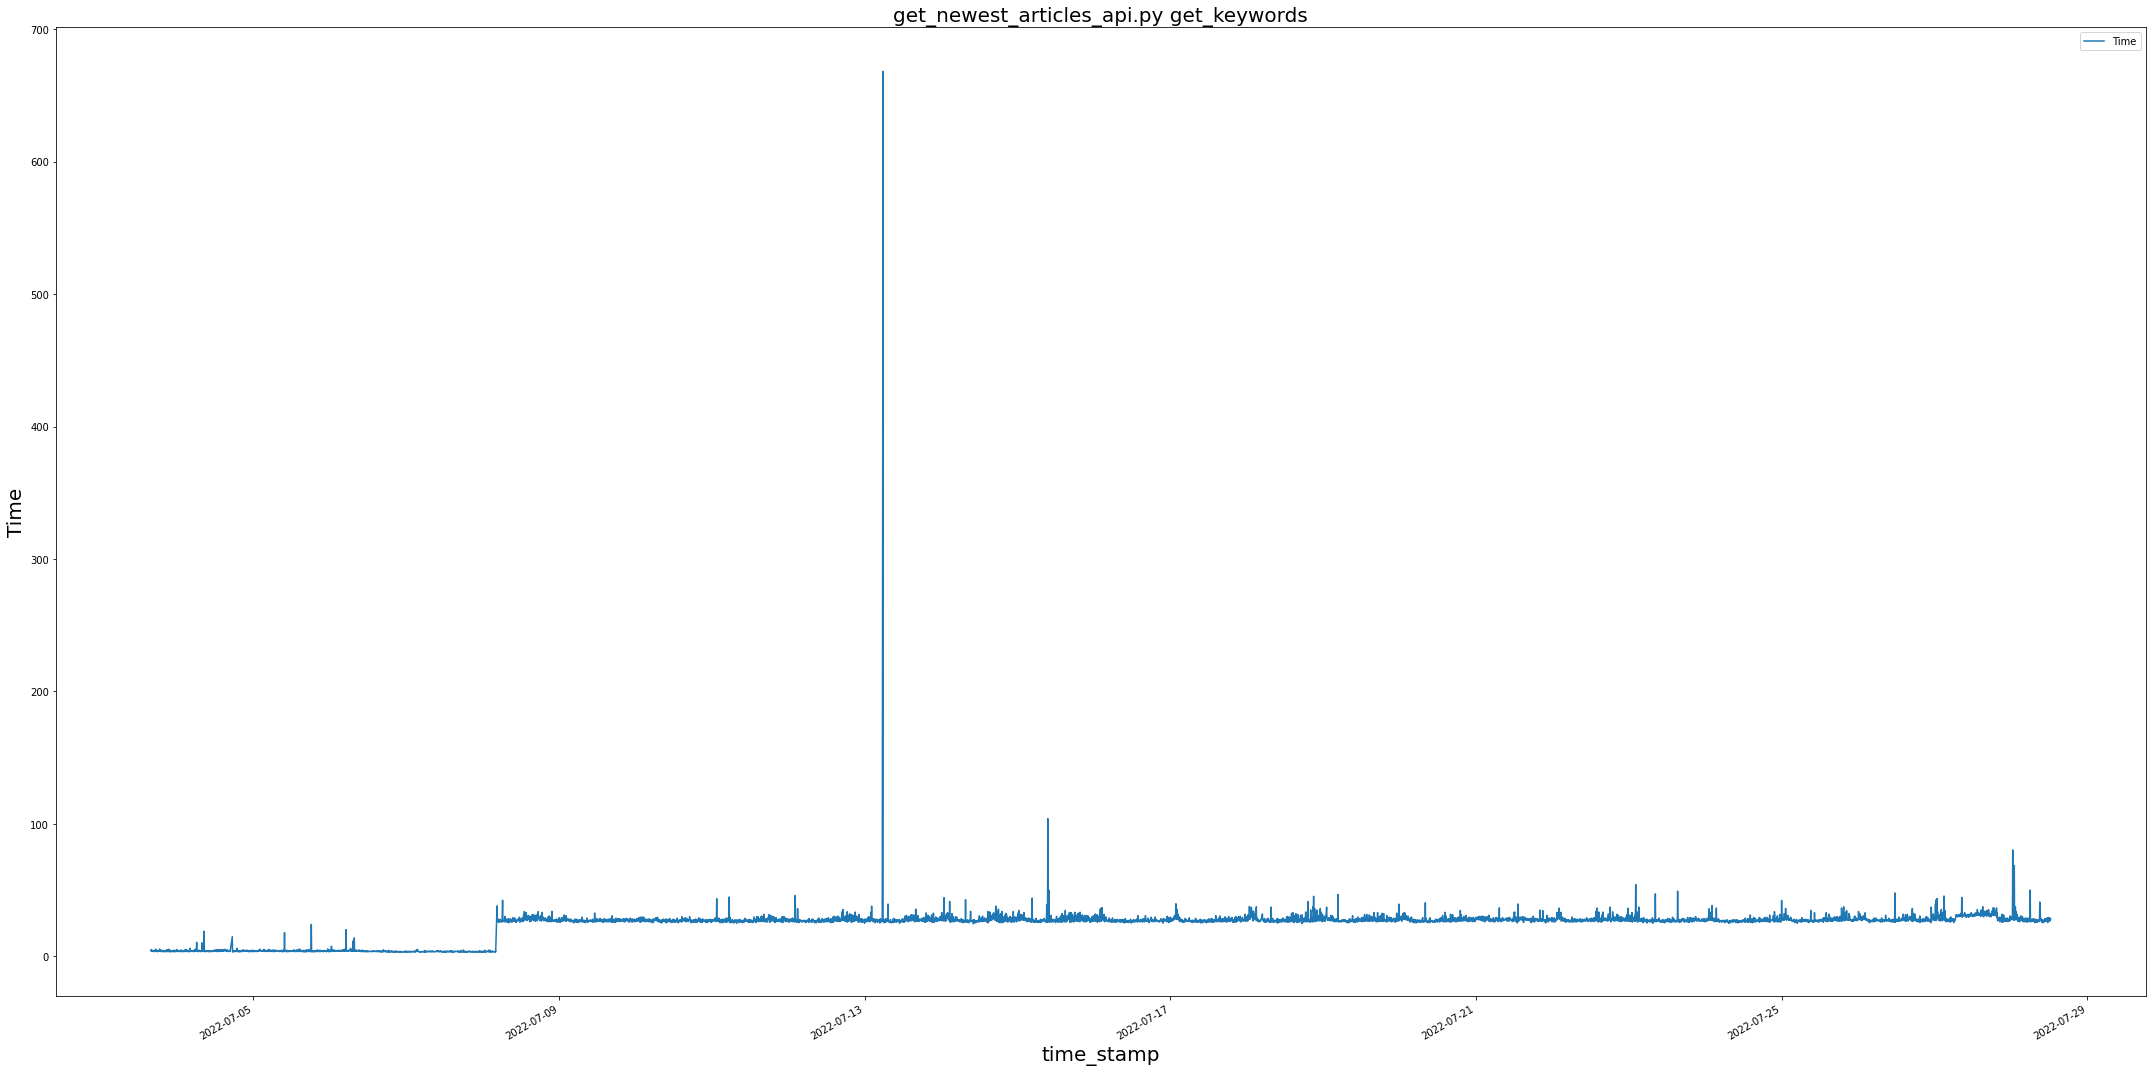

In [ ]:
plt.figure(figsize=(30, 15))
#plt.subplots_adjust(hspace=1)

# set number of columns (use 3 to demonstrate the change)
# ncols = 
# # calculate number of rows
# nrows = len(df) // ncols + (len(df) % ncols > 0)

# add a new subplot iteratively
ax = plt.subplot(1, 1, 1)
#plt.plot(times, range(times.size))
# filter df and plot ticker on the new subplot axis
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
new_dataset[new_dataset["Function"] == unique_function[0]].plot(ax=ax)
# new_dataset[new_dataset["Function"] == unique_function[0]].hist(bins=np.linspace(0,1,10),
#                                  ax=ax)
  # chart formatting
ax.set_title(unique_function[0], fontsize=20)
ax.set_xlabel('time_stamp', fontsize=20)
ax.set_ylabel('Time', fontsize=20)

plt.tight_layout()
plt.show()

**Visualize with customised the image size**

All the subplots are very clear and imge size is very short

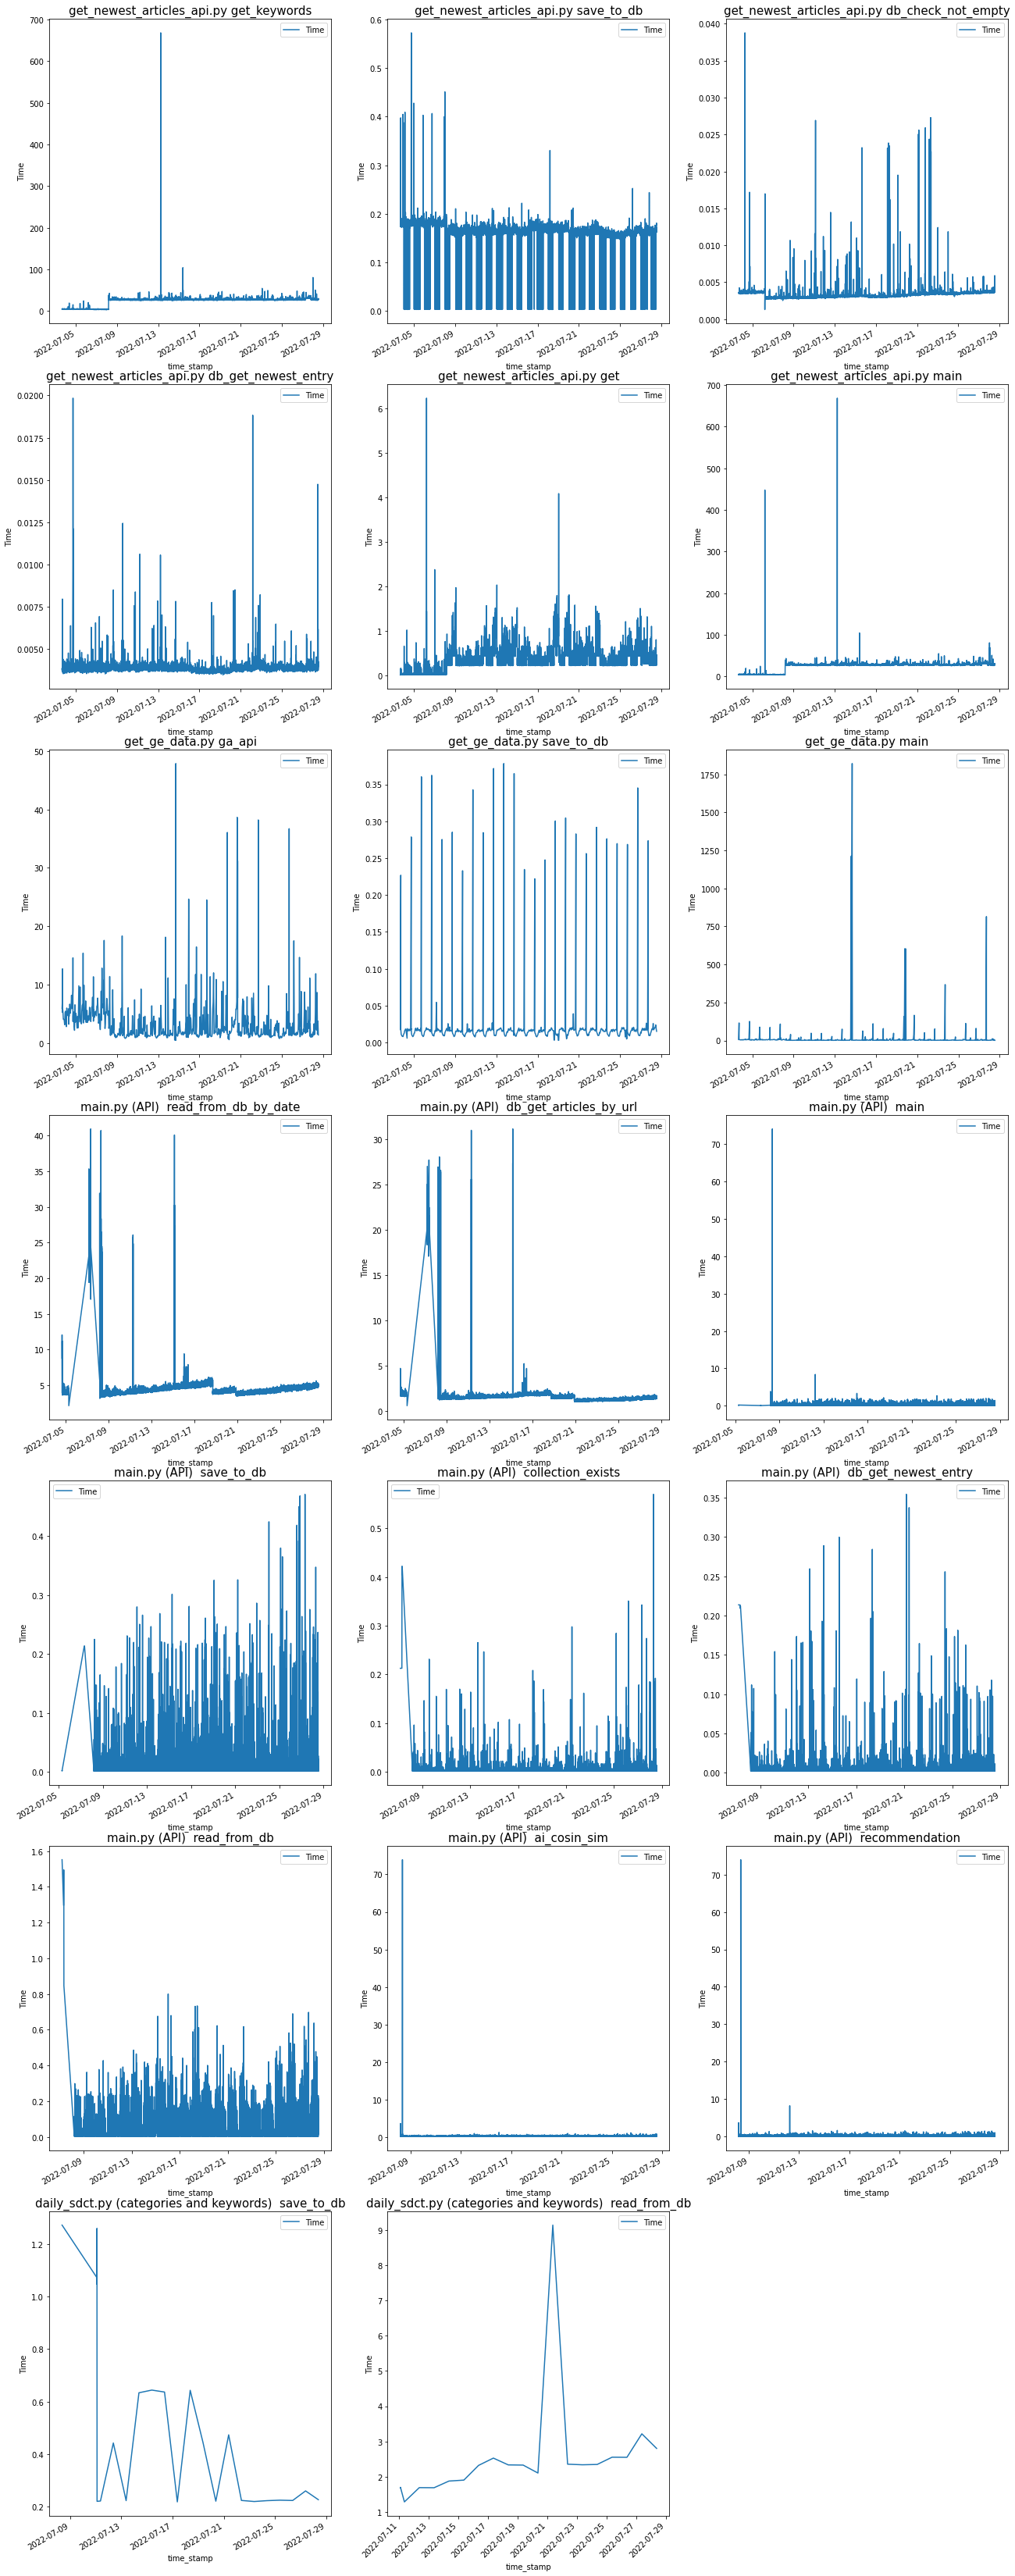

In [ ]:
#image merge on length 
# each_function = ['get_newest_articles_api.py get_keywords','get_newest_articles_api.py save_to_db',
#                  'get_newest_articles_api.py db_check_not_empty','get_newest_articles_api.py db_get_newest_entry',
#                  'get_newest_articles_api.py get','get_newest_articles_api.py main',
#                  'get_ge_data.py ga_api','get_ge_data.py save_to_db','get_ge_data.py main',
#                  'main.py (API)  read_from_db_by_date','main.py (API)  db_get_articles_by_url',
#                  'main.py (API)  main','main.py (API)  save_to_db','main.py (API)  collection_exists',
#                  'main.py (API)  db_get_newest_entry','main.py (API)  read_from_db',
#                  'main.py (API)  ai_cosin_sim','main.py (API)  recommendation',
#                  'daily_sdct.py (categories and keywords)  save_to_db',
#                  'daily_sdct.py (categories and keywords)  read_from_db']

length_functions = len(unique_function)
if length_functions%2 == 0:
  figure_col_size = 10*(length_functions//2)
  plt.figure(figsize=(22, figure_col_size+80))
elif length_functions%2 != 0:
  figure_col_size = 10*(length_functions//2)
  plt.figure(figsize=(22, figure_col_size+90))

ncols = 3
# calculate number of rows
nrows = length_functions-1

for n, each_function in enumerate(unique_function):
  # print(n)
  # print()
  # print(each_function)
  # add a new subplot iteratively
  ax = plt.subplot(nrows, ncols, n+1)
  # filter df and plot ticker on the new subplot axis
  new_dataset[new_dataset["Function"] == each_function].plot(ax=ax)
    # chart formatting
  ax.set_title(each_function, fontsize=15)
  ax.set_xlabel('time_stamp', fontsize=10)
  ax.set_ylabel('Time', fontsize=10)
#plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Interview Assessment/2_last_test'+str(n)+'.png')   # code gives me an error here

plt.show()
plt.clf()    # normally I use these lines to release the memory
plt.close()
#plt.show()